In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np 
import pandas as pd 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# importing all packages
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
! pip install imutils
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
import cv2
from keras.optimizers import SGD



  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25858 sha256=5d2284f8c78d65c0ad3a795fcbfaa935bd93ae534f531c015a44127bfc863229
  Stored in directory: /root/.cache/pip/wheels/86/d7/0a/4923351ed1cec5d5e24c1eaf8905567b02a0343b24aa873df2
Successfully built imutils
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [2]:
# derive the paths to the training, validation, and testing
# directories

trainPath = "/kaggle/input/intel-image-classification/seg_train/seg_train"
testPath = "/kaggle/input/intel-image-classification/seg_test/seg_test"
valPath = "/kaggle/input/intel-image-classification/seg_pred/seg_pred"


# determine the total number of image paths in training, validation,
# and testing directories
totalTrain = len(list(paths.list_images(trainPath)))
totalTest = len(list(paths.list_images(testPath)))
totalVal = len(list(paths.list_images(valPath)))


# determine the name of classes
class_name = os.listdir(trainPath)

print(f"Total Training images:{totalTrain}")
print(f"Total Testing images:{totalTest}")
print(f"Total validation images:{totalVal}")
print(f"Name of classes:{class_name}")
print(f"Number of classes:{len(class_name)}")




Total Training images:14034
Total Testing images:3000
Total validation images:7301
Name of classes:['mountain', 'street', 'buildings', 'sea', 'forest', 'glacier']
Number of classes:6


In [3]:
# Generator for our training data 
train_image_generator = ImageDataGenerator(rotation_range=30,fill_mode='nearest') 

# Generator for our Testing data
test_image_generator = ImageDataGenerator()


In [4]:
# Loading training data
# class_mode='categorical' because we are having categories more than 2

train_data_gen = train_image_generator.flow_from_directory(batch_size=32,
                                                           directory=trainPath,
                                                           shuffle=True,
                                                           target_size=(150,150),
                                                           class_mode='categorical')

Found 14034 images belonging to 6 classes.


In [5]:
# Loading testing data
test_data_gen = test_image_generator.flow_from_directory(batch_size=32,
                                                              directory=testPath,
                                                              shuffle=True,
                                                              target_size=(150,150),
                                                              class_mode='categorical')        


Found 3000 images belonging to 6 classes.


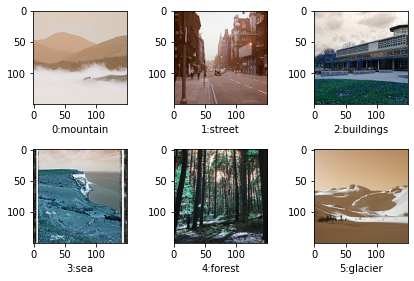

In [6]:
# Display sample images per category

# dict_imgs: key with category and values with paths to the images
dict_imgs = dict()
dict_labels = dict()
num_cat = len(os.listdir(trainPath))
num_col = int(num_cat/3)
num_row = int(np.ceil(num_cat/num_col))
i = 0
plt.subplots(num_col,num_row)

for category in os.listdir(trainPath):
    train_imgs = glob('{}/{}/*jpg'.format(trainPath, category))
    dict_imgs[category] = train_imgs    
    # sample image
    plt.subplot(num_col,num_row,i+1)
    img = cv2.imread(train_imgs[0])
    plt.imshow(img)
    plt.xlabel('{}:{}'.format(i, category))
    dict_labels[i] = category
    i += 1
plt.tight_layout()
plt.show() 

# 1. From Scratch Training

In [7]:
# build the basic model from scracth
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(len(class_name), activation='softmax')
])

In [8]:
# compile the model
# by using SGD as optimizer 
opt = SGD(lr=1e-4, momentum=0.9)
model.compile(optimizer=opt,
              loss="categorical_crossentropy",
              metrics=['accuracy'])

In [9]:
# fitting the model
EPOCHS =50
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(totalTrain / float(100))),
    epochs=EPOCHS,
    validation_data=test_data_gen,
    validation_steps=int(np.ceil(totalTest / float(100)))
)

Epoch 1/50
141/141 [==============================] - 65s 460ms/step - loss: 1.9945 - accuracy: 0.3597 - val_loss: 1.7817 - val_accuracy: 0.3156
Epoch 2/50
141/141 [==============================] - 56s 397ms/step - loss: 1.5449 - accuracy: 0.4778 - val_loss: 1.5374 - val_accuracy: 0.4750
Epoch 3/50
141/141 [==============================] - 46s 326ms/step - loss: 1.4056 - accuracy: 0.5277 - val_loss: 1.5651 - val_accuracy: 0.4156
Epoch 4/50
141/141 [==============================] - 41s 289ms/step - loss: 1.3079 - accuracy: 0.5488 - val_loss: 1.2515 - val_accuracy: 0.5479
Epoch 5/50
141/141 [==============================] - 37s 261ms/step - loss: 1.2437 - accuracy: 0.5771 - val_loss: 1.0257 - val_accuracy: 0.6104
Epoch 6/50
141/141 [==============================] - 35s 245ms/step - loss: 1.2015 - accuracy: 0.5816 - val_loss: 1.2394 - val_accuracy: 0.5583
Epoch 7/50
141/141 [==============================] - 33s 231ms/step - loss: 1.1289 - accuracy: 0.6084 - val_loss: 1.1513 - val_ac

In [10]:
# determine the loss and accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

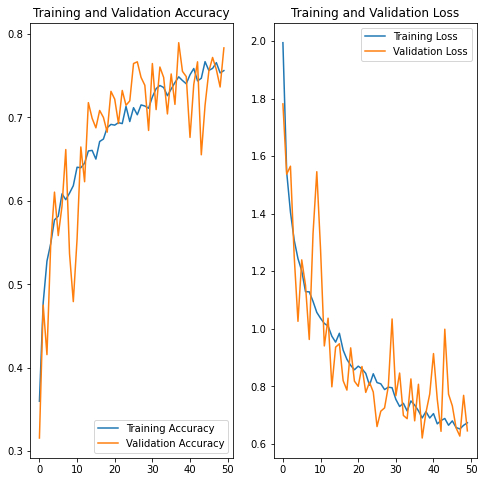

In [11]:
# plotting the graph of accuracy and training
epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

<h4>Observation:</h4>
1.The validation loss is not diverge properly<br>
2.Accuracy is quiet low

# 2. Transfer-learning :
Here using VGG16 as a base model and imagenet weights upon that going to train new model for 6 categories<br>
The base model layers will be same.


In [12]:
# With the help of transfer learning
from keras.layers import Input, Lambda, Dense, Flatten,Dropout
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from keras.optimizers import SGD

In [13]:
# add preprocessing layer to the front of VGG
baseModel = VGG16(input_shape=(150,150,3), weights='imagenet', include_top=False)




58892288/58889256 [==============================] - 0s 0us/step


In [14]:
# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(512, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(len(class_name), activation="softmax")(headModel)

# create a model object
model = Model(inputs=baseModel.input, outputs=headModel)

# don't train existing weights
for layer in baseModel.layers:
  layer.trainable = False
  
# view the structure of the model
model.summary()



Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [15]:
# compile our model (this needs to be done after our setting our
# layers to being non-trainable
print("[INFO] compiling model...")
opt = SGD(lr=1e-4, momentum=0.9)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])

print("[INFO] training head...")
H = model.fit_generator(
	train_data_gen,
	steps_per_epoch=100,
	validation_data=test_data_gen,
	validation_steps=100,
	epochs=50)



[INFO] compiling model...
[INFO] training head...
Epoch 1/50
100/100 [==============================] - 25s 253ms/step - loss: 5.5023 - accuracy: 0.6642 - val_loss: 1.7616 - val_accuracy: 0.8427
Epoch 2/50
100/100 [==============================] - 25s 249ms/step - loss: 2.3656 - accuracy: 0.7856 - val_loss: 1.3531 - val_accuracy: 0.8450
Epoch 3/50
100/100 [==============================] - 26s 256ms/step - loss: 1.7153 - accuracy: 0.7872 - val_loss: 0.9293 - val_accuracy: 0.8493
Epoch 4/50
100/100 [==============================] - 24s 242ms/step - loss: 1.2387 - accuracy: 0.7991 - val_loss: 0.8027 - val_accuracy: 0.8507
Epoch 5/50
100/100 [==============================] - 25s 248ms/step - loss: 1.0499 - accuracy: 0.7963 - val_loss: 0.7468 - val_accuracy: 0.8537
Epoch 6/50
100/100 [==============================] - 26s 257ms/step - loss: 0.9281 - accuracy: 0.7966 - val_loss: 0.7441 - val_accuracy: 0.8503
Epoch 7/50
100/100 [==============================] - 25s 254ms/step - loss: 0.7

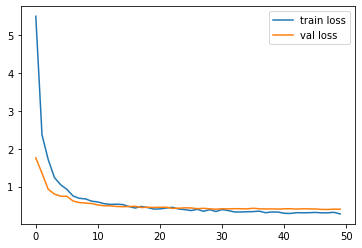

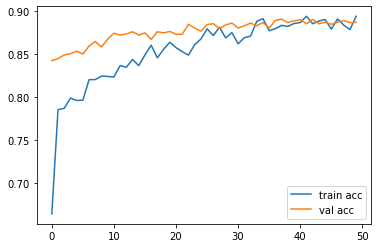

In [16]:
# loss
plt.plot(H.history['loss'], label='train loss')
plt.plot(H.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# accuracies
plt.plot(H.history['accuracy'], label='train acc')
plt.plot(H.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()


In [17]:
# saving model in local directory
model.save('./transfer_learning.h5')


<h4>Observation:</h4>
1.Accuracy improve than the scratch training.<br>
Accuracy:88%


# 3. Fine Tuning
Using same base model as VGG16 <br>
Our base model have total 19 layers, so will retrain from the 15th layer onwards

In [18]:
# add preprocessing layer to the front of VGG
baseModel1 = VGG16(input_shape=(150,150,3), weights='imagenet', include_top=False)

# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(baseModel1.layers))


# Freeze all the layers before the `fine_tune_at` layer
for layer in baseModel1.layers[:15]:
  layer.trainable = False

for layer in baseModel1.layers:
    print("{}: {}".format(layer, layer.trainable))

Number of layers in the base model:  19
<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7fba4eb2c710>: False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fbe306a8550>: False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fbe3069be50>: False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fba4ea9ea10>: False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fbe30764110>: False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fba4eacdf50>: False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fba4eac65d0>: False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fbeb4065610>: False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fba4ea53910>: False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fba4ea5a1d0>: False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fba4ea61910>: False
<tensorflow.

In [19]:
# create a model object
headModel = baseModel1.output
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(512, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(len(class_name), activation="softmax")(headModel)

model = Model(inputs=baseModel1.input, outputs=headModel)

# view the structure of the model
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0   

In [20]:
# recompile our model (this needs to be done after our setting our
# layers to being non-trainable
print("[INFO] compiling model...")
opt = SGD(lr=1e-4, momentum=0.9)
model.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])

print("[INFO] training head...")
H = model.fit_generator(
	train_data_gen,
	steps_per_epoch=100,
	validation_data=test_data_gen,
	validation_steps=100,
	epochs=50)

[INFO] compiling model...
[INFO] training head...
Epoch 1/50
100/100 [==============================] - 25s 248ms/step - loss: 2.2896 - accuracy: 0.4191 - val_loss: 1.3651 - val_accuracy: 0.4777
Epoch 2/50
100/100 [==============================] - 27s 268ms/step - loss: 1.3226 - accuracy: 0.4681 - val_loss: 1.0929 - val_accuracy: 0.6253
Epoch 3/50
100/100 [==============================] - 27s 267ms/step - loss: 1.0405 - accuracy: 0.6466 - val_loss: 0.7883 - val_accuracy: 0.7543
Epoch 4/50
100/100 [==============================] - 24s 239ms/step - loss: 0.8609 - accuracy: 0.7119 - val_loss: 0.6395 - val_accuracy: 0.8210
Epoch 5/50
100/100 [==============================] - 27s 269ms/step - loss: 0.6660 - accuracy: 0.7962 - val_loss: 0.5562 - val_accuracy: 0.8287
Epoch 6/50
100/100 [==============================] - 27s 266ms/step - loss: 0.5797 - accuracy: 0.8138 - val_loss: 0.5805 - val_accuracy: 0.8423
Epoch 7/50
100/100 [==============================] - 26s 262ms/step - loss: 0.4

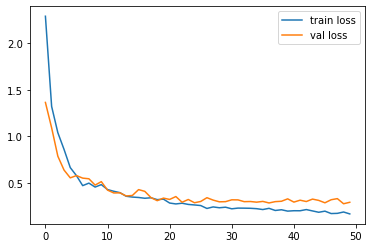

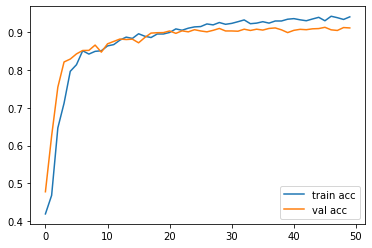

In [21]:
# saving model in local directory
model.save('./fine_tuning.h5')
# loss
plt.plot(H.history['loss'], label='train loss')
plt.plot(H.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# accuracies
plt.plot(H.history['accuracy'], label='train acc')
plt.plot(H.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()


# Conclusion
1. we are getting highest accuracy by fine tuning the base model.<br>
Accuracy: 91%

# Loading  the saved model and infernce on the images

[INFO] loading model...
buildings: 100.00%


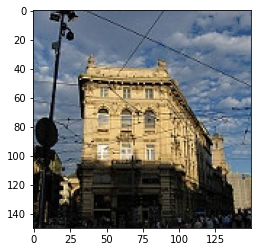

In [22]:

# loading model and inferening on single image
from keras.models import load_model
import numpy as np
import argparse
import imutils
import cv2
%matplotlib inline
import matplotlib.pyplot as plt


# load the trained model from disk
print("[INFO] loading model...")
model = load_model("./transfer_learning.h5")

# pass the image through the network to obtain our predictions

image = cv2.imread("/kaggle/input/intel-image-classification/seg_pred/seg_pred/10048.jpg")
output = image.copy()
output = imutils.resize(output, width=400)


# our model was trained on RGB ordered images but OpenCV represents
# images in BGR order, so swap the channels, and then resize to
# 150x150 (the input dimensions for VGG16)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (150, 150))

# plot the image
plt.imshow(image)

# convert the image to a floating point data type and perform mean
# image = image.astype("float32")

CLASSES = ['buildings', 'forest', 'glacier' , 'mountain', 'sea', 'street' ]

preds = model.predict(np.expand_dims(image, axis=0))[0]
# print(preds)
i = np.argmax(preds)
label = CLASSES[i]
# draw the prediction on the output image
text = "{}: {:.2f}%".format(label, preds[i] * 100)
print(text)

